In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Subclasses

In [2]:
# read in data
subclasses = pd.read_csv('/path/to/9_FINAL/data/matches_pids/subclass_with_pid.csv', sep=";")
del subclasses['Unnamed: 0']
subclasses.head()

,subClass,class,frequency,pidspread,pldspread,id,pids
0,10,decade,2,1,2,108191420,['p3a']
1,abbess,nun,12,7,11,403873869,"['p4p8ap3a', 'p3a', 'p8b', 'p4', 'p8b', 'p27a'..."
2,abbot,person,48,7,32,156276663,"['p4p1', 'p1', 'p1', 'p1', 'p1', 'p8b', 'p3a',..."
3,actuary,statistician,3,2,3,512259817,['p4p8a']
4,activist,person,172,16,101,485263422,"['p4p23dp2p39p1p23ap23bp8ap3ap43', 'p6p8bp3ap4..."


## 1.0 Number of Tokens

In [5]:
# count number of tokens for subclass
more_than_one_token_subclass = []

for subclass in subclasses['subClass']:
    no_tokens = subclass.split(' ')
    
    if len(no_tokens) > 1:
        more_than_one_token_subclass.append(subclass)

len(more_than_one_token_subclass)

0

In [6]:
# count number of tokens for class
more_than_one_token_class = []

for subclass in subclasses['class']:
    no_tokens = subclass.split(' ')
    
    if len(no_tokens) > 1:
        more_than_one_token_class.append(subclass)

len(more_than_one_token_class)

0

## 1.1 pidspread

denotes the number of pids

In [3]:
# show how many pids are the "norm"
subclasses['pidspread'].describe() # mean are 11.62

count    1692.000000
mean       11.618203
std        11.494564
min         1.000000
25%         2.000000
50%         7.000000
75%        18.000000
max        50.000000
Name: pidspread, dtype: float64

In [4]:
subclasses['pidspread'].value_counts()

1     277
2     150
3     130
4      89
6      72
5      71
7      62
8      59
9      59
11     58
10     55
12     37
15     32
13     31
14     31
19     30
20     28
16     27
21     26
17     25
32     21
23     21
30     20
24     19
18     19
25     19
26     19
33     18
22     17
31     17
29     16
28     14
27     11
39     11
38     10
34     10
40      9
36      9
37      9
35      9
42      8
41      7
43      7
46      6
44      6
45      6
50      2
47      1
48      1
49      1
Name: pidspread, dtype: int64

## 1.2 pid distribution

In [5]:
# replace unnecessary signs
subclasses['pids'] = subclasses['pids'].replace('\]|,\s|\'|\[', '', regex=True)
subclasses

,subClass,class,frequency,pidspread,pldspread,id,pids
0,10,decade,2,1,2,108191420,p3a
1,abbess,nun,12,7,11,403873869,p4p8ap3ap3ap8bp4p8bp27ap2p1
2,abbot,person,48,7,32,156276663,p4p1p1p1p1p1p8bp3ap5p1p8ap1p1p8ap1p8bp3ap8bp8a...
3,actuary,statistician,3,2,3,512259817,p4p8a
4,activist,person,172,16,101,485263422,p4p23dp2p39p1p23ap23bp8ap3ap43p6p8bp3ap43p1p3a...
...,...,...,...,...,...,...,...
1687,settler,person,51,11,29,268333824,p4p1p10p8ap3ap26p1p3ap8bp8ap25p1p4p1p2p3ap1p25...
1688,sexologist,person,3,1,3,256209884,p8ap8a
1689,senator,politician,318,19,218,244899548,p5p4p23dp2p1p38p20cp10p8ap8bp3ap4p1p8ap3ap1p3a...
1690,inquisitor,person,8,6,8,255923968,p8ap43p4p1p26p2


In [6]:
# get all different pids
subclasses['pids_sanitized'] = subclasses['pids'].str.split('p')

all_pids = []
for index, row in subclasses.iterrows():
    for element in row['pids_sanitized']:
        if element not in all_pids:
            all_pids.append(element)

all_pids.remove('') # remove empty element

In [7]:
len(all_pids) # in total 57 different pids in subclasses

57

In [8]:
# append number of occurrences as new column to subclasses dataframe
def pid_exists(row, pid):
    if pid in row['pids']:
        return 1
    else:
        return 0

occurences = [] # no of occurences of pids

for pid in all_pids:
    
    subclasses[pid] = subclasses.apply(lambda x: pid_exists(x, pid), axis=1) # create new column with one hot encoded occurence
    print('pid: {} || total occurence: {}'.format(pid, subclasses[pid].sum())) # for debugging
    occurences.append(subclasses[pid].sum())

pid: 3a || total occurence: 1112
pid: 4 || total occurence: 983
pid: 8a || total occurence: 1357
pid: 8b || total occurence: 862
pid: 27a || total occurence: 284
pid: 2 || total occurence: 1220
pid: 1 || total occurence: 1253
pid: 5 || total occurence: 1138
pid: 39 || total occurence: 194
pid: 23d || total occurence: 568
pid: 23a || total occurence: 391
pid: 23b || total occurence: 463
pid: 43 || total occurence: 495
pid: 6 || total occurence: 744
pid: 12a || total occurence: 420
pid: 21a || total occurence: 418
pid: 25 || total occurence: 586
pid: 36 || total occurence: 203
pid: 26 || total occurence: 604
pid: 23c || total occurence: 275
pid: 28d || total occurence: 173
pid: 27b || total occurence: 257
pid: 28b || total occurence: 378
pid: 15a || total occurence: 329
pid: 21d || total occurence: 355
pid: 11 || total occurence: 198
pid: 20c || total occurence: 402
pid: 20d || total occurence: 351
pid: 8c || total occurence: 499
pid: 10 || total occurence: 565
pid: 34 || total occurence

In [9]:
subclasses

,subClass,class,frequency,pidspread,pldspread,id,pids,pids_sanitized,3a,4,...,29a,28c,37,30a,12b,42,30b,22b,31a,29c
0,10,decade,2,1,2,108191420,p3a,"[, 3a]",1,0,...,0,0,0,0,0,0,0,0,0,0
1,abbess,nun,12,7,11,403873869,p4p8ap3ap3ap8bp4p8bp27ap2p1,"[, 4, 8a, 3a, 3a, 8b, 4, 8b, 27a, 2, 1]",1,1,...,0,0,0,0,0,0,0,0,0,0
2,abbot,person,48,7,32,156276663,p4p1p1p1p1p1p8bp3ap5p1p8ap1p1p8ap1p8bp3ap8bp8a...,"[, 4, 1, 1, 1, 1, 1, 8b, 3a, 5, 1, 8a, 1, 1, 8...",1,1,...,0,0,0,0,0,0,0,0,0,0
3,actuary,statistician,3,2,3,512259817,p4p8a,"[, 4, 8a]",0,1,...,0,0,0,0,0,0,0,0,0,0
4,activist,person,172,16,101,485263422,p4p23dp2p39p1p23ap23bp8ap3ap43p6p8bp3ap43p1p3a...,"[, 4, 23d, 2, 39, 1, 23a, 23b, 8a, 3a, 43, 6, ...",1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687,settler,person,51,11,29,268333824,p4p1p10p8ap3ap26p1p3ap8bp8ap25p1p4p1p2p3ap1p25...,"[, 4, 1, 10, 8a, 3a, 26, 1, 3a, 8b, 8a, 25, 1,...",1,1,...,0,0,0,0,0,0,0,0,0,0
1688,sexologist,person,3,1,3,256209884,p8ap8a,"[, 8a, 8a]",0,0,...,0,0,0,0,0,0,0,0,0,0
1689,senator,politician,318,19,218,244899548,p5p4p23dp2p1p38p20cp10p8ap8bp3ap4p1p8ap3ap1p3a...,"[, 5, 4, 23d, 2, 1, 38, 20c, 10, 8a, 8b, 3a, 4...",1,1,...,0,0,0,0,0,0,0,0,0,0
1690,inquisitor,person,8,6,8,255923968,p8ap43p4p1p26p2,"[, 8a, 43, 4, 1, 26, 2]",0,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# analyse occurence
pids_analysis = pd.DataFrame({'pid': all_pids,
                             'occurences': occurences})
pids_analysis = pids_analysis.sort_values(by='occurences', ascending=False)

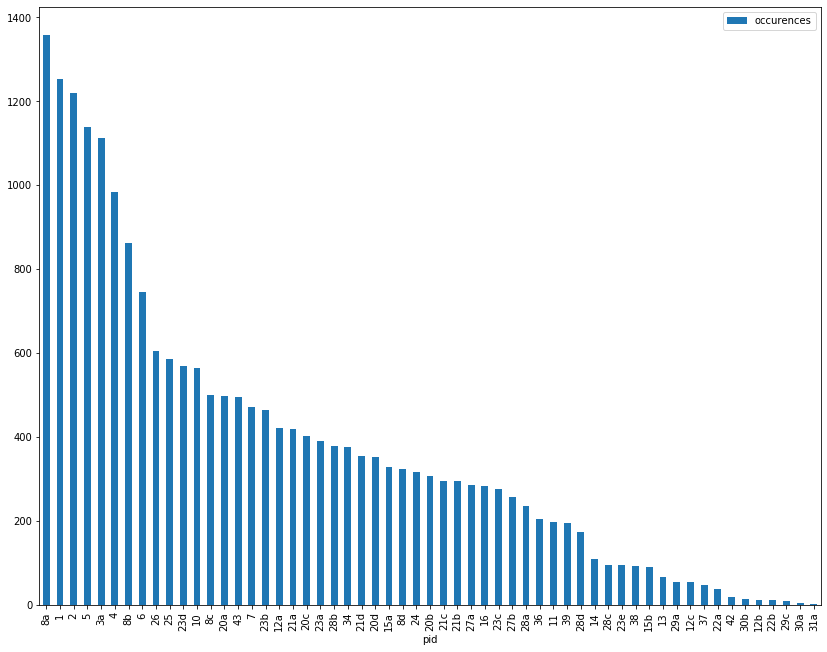

In [11]:
# plot results
pids_analysis.plot(x='pid', y='occurences', kind='bar', figsize=(14,11)) 
#p8a, p1, p2, p5 and p3a most common patterns

# 2. types

In [7]:
# read in data
types = pd.read_csv('path/to/9_FINAL/data/matches_pids/types_with_pid.csv', sep=";")
del types['Unnamed: 0']
types.head()

,instance,class,frequency,pidspread,pldspread,id,pids
0,1988,album,4,2,4,89520215,"['p3a', 'p5', 'p5', 'p3a']"
1,196,year,1,1,1,250210719,['p8b']
2,53,year,2,1,1,333976287,['p8b']
3,2007,year,104,6,57,179643001,"['p25p8ap8b', 'p8b', 'p8b', 'p25', 'p8b', 'p8b..."
4,2,aircraft,21,4,16,472381603,"['p8b', 'p8b', 'p8b', 'p3a', 'p8b', 'p5', 'p8b..."


## 2.0 No Tokens

In [9]:
# count number of tokens for instance
more_than_one_token_types = []

for subclass in types['instance']:
    no_tokens = str(subclass).split(' ')
    
    if len(no_tokens) > 1:
        more_than_one_token_types.append(subclass)

len(more_than_one_token_types)

0

In [10]:
# count number of tokens for subclass
more_than_one_token_class = []

for subclass in types['class']:
    no_tokens = str(subclass).split(' ')
    
    if len(no_tokens) > 1:
        more_than_one_token_class.append(subclass)

len(more_than_one_token_class)

0

## 2.1 pidspread

In [13]:
# show how many pids are the "norm"
types['pidspread'].describe() # mean are 4.73

count    20745.000000
mean         4.730586
std          8.027675
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         57.000000
Name: pidspread, dtype: float64

In [14]:
types['pidspread'].value_counts()

1     9931
2     3289
3     1676
4     1030
5      703
6      544
7      399
8      352
9      268
10     233
11     183
13     150
12     148
14     140
16     111
15      99
17      96
20      81
22      74
19      73
18      71
21      70
24      64
25      62
23      59
29      54
26      50
28      49
30      44
34      43
35      40
31      39
27      35
36      35
32      34
38      34
40      33
33      31
39      30
42      26
41      26
45      26
37      24
43      23
44      21
47      21
51      20
49      20
48      19
46      14
53      13
50      11
52       8
54       7
55       6
56       2
57       1
Name: pidspread, dtype: int64

## 2.2 pid distribution

In [15]:
# replace unnecessary signs
types['pids'] = types['pids'].replace('\]|,\s|\'|\[', '', regex=True)
types

,instance,class,frequency,pidspread,pldspread,id,pids
0,1988,album,4,2,4,89520215,p3ap5p5p3a
1,196,year,1,1,1,250210719,p8b
2,53,year,2,1,1,333976287,p8b
3,2007,year,104,6,57,179643001,p25p8ap8bp8bp8bp25p8bp8bp8ap8bp8bp1p8bp8bp8bp8...
4,2,aircraft,21,4,16,472381603,p8bp8bp8bp3ap8bp5p8bp8ap8ap8ap8bp8b
...,...,...,...,...,...,...,...
20740,internexin,protein,2,2,2,217185695,p5p3a
20741,interdata,minicomputer,1,1,1,252785646,p5
20742,inconel,superalloy,38,6,21,243847077,p5p1p15bp5p8ap8ap8ap8ap8ap5p3ap8ap5p5p5p1p5p5p...
20743,investedin,website,3,1,3,219973437,p8a


In [16]:
# get all different pids
types['pids_sanitized'] = types['pids'].str.split('p')

all_pids = []
for index, row in types.iterrows():
    for element in row['pids_sanitized']:
        if element not in all_pids:
            all_pids.append(element)

all_pids.remove('') # remove empty element

In [17]:
len(all_pids) # in total 58 different pids in types, one more than in subclasses

58

In [18]:
# append number of occurrences as new column to types dataframe
occurences = [] # no of occurences of pids

for pid in all_pids:
    
    types[pid] = types.apply(lambda x: pid_exists(x, pid), axis=1) # create new column with one hot encoded occurence
    print('pid: {} || total occurence: {}'.format(pid, types[pid].sum())) # for debugging
    occurences.append(types[pid].sum())

pid: 3a || total occurence: 6455
pid: 5 || total occurence: 9647
pid: 8b || total occurence: 4402
pid: 25 || total occurence: 2194
pid: 8a || total occurence: 14488
pid: 1 || total occurence: 7119
pid: 2 || total occurence: 7546
pid: 26 || total occurence: 2027
pid: 28a || total occurence: 1106
pid: 23b || total occurence: 1756
pid: 27b || total occurence: 1313
pid: 20c || total occurence: 1850
pid: 28b || total occurence: 1477
pid: 20a || total occurence: 2300
pid: 21c || total occurence: 1237
pid: 20b || total occurence: 1126
pid: 21d || total occurence: 1401
pid: 7 || total occurence: 2235
pid: 20d || total occurence: 1256
pid: 28d || total occurence: 946
pid: 8c || total occurence: 2533
pid: 21a || total occurence: 1566
pid: 23a || total occurence: 1522
pid: 8d || total occurence: 1567
pid: 21b || total occurence: 1129
pid: 27a || total occurence: 1434
pid: 23d || total occurence: 2496
pid: 34 || total occurence: 1870
pid: 37 || total occurence: 512
pid: 23c || total occurence: 948

In [19]:
# analyse occurence
pids_analysis_types = pd.DataFrame({'pid': all_pids,
                             'occurences': occurences})
pids_analysis_types = pids_analysis_types.sort_values(by='occurences', ascending=False)

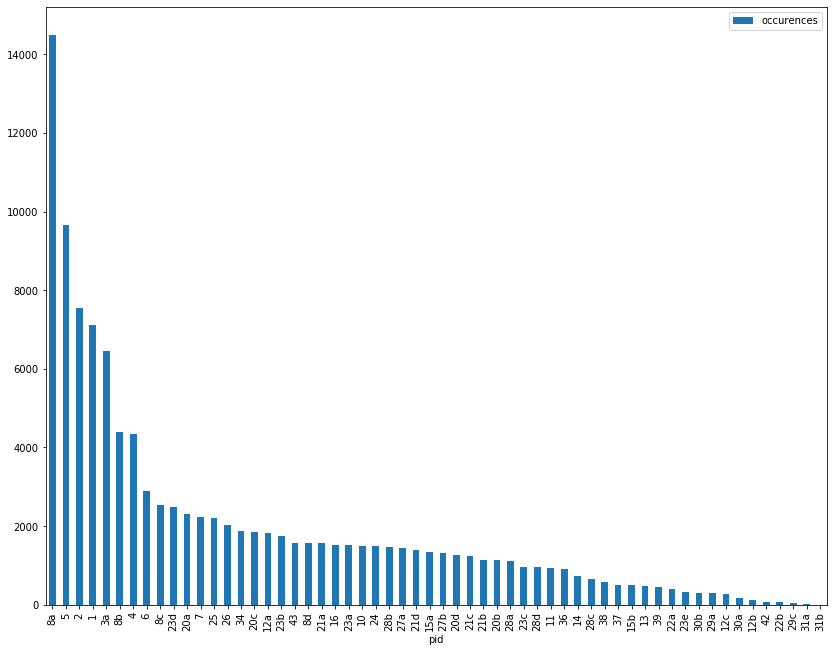

In [20]:
# plot results
pids_analysis_types.plot(x='pid', y='occurences', kind='bar', figsize=(14,11)) 
#p8a, p5, p2, p1 and p3a most common patterns

# 3. transitive types

In [12]:
# read in data
ttypes = pd.read_csv('path/to/9_FINAL/data/matches_pids/transitive-types_with_pid.csv', sep=";")
del ttypes['Unnamed: 0']
ttypes.head()

,instance,class,frequency,pidspread,pldspread,id,pids
0,2002,season,2,2,2,303245024,"['p8b', 'p3a']"
1,44,weapon,2,2,2,107884750,"['p8a', 'p8c']"
2,55,company,1,1,1,30037411,['p8c']
3,44,device,1,1,1,107130687,['p21d']
4,2,work,126,16,72,215469565,"['p4p15ap25p8ap8cp43', 'p8ap8c', 'p8a', 'p8a',..."


## 3.0 No Tokens

In [13]:
# count number of tokens for instance
more_than_one_token_ttypes = []

for subclass in ttypes['instance']:
    no_tokens = str(subclass).split(' ')
    
    if len(no_tokens) > 1:
        more_than_one_token_ttypes.append(subclass)

len(more_than_one_token_ttypes)

0

In [14]:
# count number of tokens for class
more_than_one_token_class = []

for subclass in ttypes['class']:
    no_tokens = str(subclass).split(' ')
    
    if len(no_tokens) > 1:
        more_than_one_token_ttypes.append(subclass)

len(more_than_one_token_class)

0

## 3.1 pidspread

In [22]:
# show how many pids are the "norm"
ttypes['pidspread'].describe() # mean are 3.286

count    99588.000000
mean         3.286771
std          5.031016
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         52.000000
Name: pidspread, dtype: float64

In [23]:
ttypes['pidspread'].value_counts()

1     52081
2     16151
3      8613
4      5231
5      3588
6      2531
7      1879
8      1410
9      1079
10      886
11      740
12      605
13      509
14      418
15      402
16      331
17      269
19      242
18      239
20      236
21      193
23      166
22      164
24      143
26      134
25      127
27      122
29      115
28      108
32       92
31       88
30       87
33       78
34       65
36       65
35       63
37       52
38       48
39       44
40       42
42       31
41       27
46       25
43       17
44       17
45       15
47        8
49        5
48        3
50        2
51        1
52        1
Name: pidspread, dtype: int64

## 3.2 pid distribution

In [24]:
# replace unnecessary signs
ttypes['pids'] = ttypes['pids'].replace('\]|,\s|\'|\[', '', regex=True)
ttypes

,instance,class,frequency,pidspread,pldspread,id,pids
0,2002,season,2,2,2,303245024,p8bp3a
1,44,weapon,2,2,2,107884750,p8ap8c
2,55,company,1,1,1,30037411,p8c
3,44,device,1,1,1,107130687,p21d
4,2,work,126,16,72,215469565,p4p15ap25p8ap8cp43p8ap8cp8ap8ap8ap8ap8ap8ap8ap...
...,...,...,...,...,...,...,...
99583,india,city,251,29,206,205155758,p5p4p1p15bp23ap24p8ap3ap21bp21cp21dp12ap3ap21c...
99584,india,settlement,29,7,26,259383873,p1p2p25p8ap8bp21bp8ap8bp8ap3ap8ap3ap8a
99585,in-a-gadda-da-vida,song,8,3,7,203100816,p8ap8ap8ap8ap8bp8ap20a
99586,interfaithfamily,organization,2,2,1,241033740,p8ap5


In [25]:
# get all different pids
ttypes['pids_sanitized'] = ttypes['pids'].str.split('p')

all_pids = []
for index, row in ttypes.iterrows():
    for element in row['pids_sanitized']:
        if element not in all_pids:
            all_pids.append(element)

all_pids.remove('') # remove empty element

In [26]:
len(all_pids) # in total 58 different pids in transitive types, one more than in subclasses

58

In [27]:
# append number of occurrences as new column to types dataframe
occurences = [] # no of occurences of pids

for pid in all_pids:
    
    ttypes[pid] = ttypes.apply(lambda x: pid_exists(x, pid), axis=1) # create new column with one hot encoded occurence
    print('pid: {} || total occurence: {}'.format(pid, ttypes[pid].sum())) # for debugging
    occurences.append(ttypes[pid].sum())

pid: 8b || total occurence: 19861
pid: 3a || total occurence: 29480
pid: 8a || total occurence: 64733
pid: 8c || total occurence: 7298
pid: 21d || total occurence: 3456
pid: 4 || total occurence: 11646
pid: 15a || total occurence: 3233
pid: 25 || total occurence: 5879
pid: 43 || total occurence: 4342
pid: 1 || total occurence: 35141
pid: 20a || total occurence: 9016
pid: 5 || total occurence: 41217
pid: 28b || total occurence: 3025
pid: 2 || total occurence: 29525
pid: 23d || total occurence: 5686
pid: 28a || total occurence: 1438
pid: 21a || total occurence: 5370
pid: 13 || total occurence: 550
pid: 28d || total occurence: 1516
pid: 20c || total occurence: 5687
pid: 38 || total occurence: 837
pid: 15b || total occurence: 796
pid: 27b || total occurence: 2299
pid: 12a || total occurence: 6676
pid: 23a || total occurence: 3601
pid: 26 || total occurence: 5385
pid: 16 || total occurence: 3025
pid: 10 || total occurence: 12535
pid: 21b || total occurence: 2897
pid: 8d || total occurence: 

In [28]:
# analyse occurence
pids_analysis_ttypes = pd.DataFrame({'pid': all_pids,
                             'occurences': occurences})
pids_analysis_ttypes = pids_analysis_ttypes.sort_values(by='occurences', ascending=False)

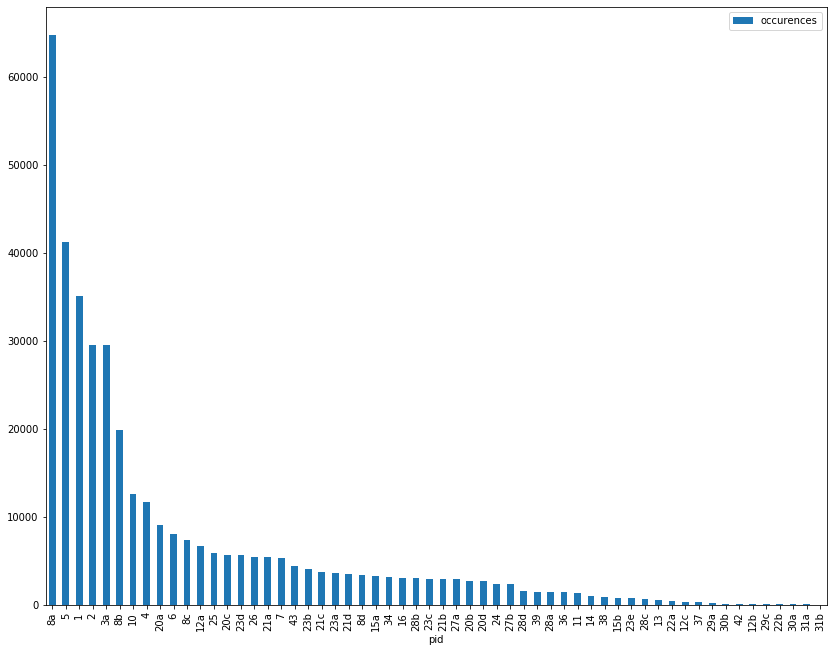

In [30]:
# plot results
pids_analysis_ttypes.plot(x='pid', y='occurences', kind='bar', figsize=(14,11)) 
#p8a, p5, p1, p2 and p3a most common patterns

# 4. transitive subclasses

In [16]:
# read in data
transitive_subclasses = pd.read_csv('/path/to/9_FINAL/data/matches_pids/transitive-subclass_with_pid.csv', sep=";")
del transitive_subclasses['Unnamed: 0']
del transitive_subclasses['Unnamed: 0.1']
transitive_subclasses.head()

,_id,instance,class,frequency,pidspread,pldspread,modifications
0,131086904,2,place,114,18,90,"['p23dp25p10p12ap8ap20ap8c', 'p8ap8c', 'p8a', ..."
1,131113752,9,place,28,8,25,"['p8ap20a', 'p8ap20a', 'p2', 'p8c', 'p8a', 'p1..."
2,131185728,3,place,83,14,59,"['p4p15ap1p20cp8ap28bp3a', 'p20c', 'p8a', 'p8a..."
3,131393096,6,place,55,11,37,"['p2p1p8ap28b', 'p4', 'p8a', 'p8a', 'p8a', 'p8..."
4,131588387,7,place,46,12,33,"['p1p8ap20a', 'p8ap8c', 'p27b', 'p8a', 'p8a', ..."


## 4.0 No Tokens

In [17]:
# count number of tokens for instance
more_than_one_token_tsubclasses = []

for subclass in transitive_subclasses['instance']:
    no_tokens = str(subclass).split(' ')
    
    if len(no_tokens) > 1:
        more_than_one_token_tsubclasses.append(subclass)

len(more_than_one_token_tsubclasses)

0

In [18]:
# count number of tokens for classes
more_than_one_token_tsubclasses = []

for subclass in transitive_subclasses['class']:
    no_tokens = str(subclass).split(' ')
    
    if len(no_tokens) > 1:
        more_than_one_token_tsubclasses.append(subclass)

len(more_than_one_token_tsubclasses)

0

## 4.1 pidspread

In [32]:
# show how many pids are the "norm"
transitive_subclasses['pidspread'].describe() # mean are 10.98

count    2120.000000
mean       10.976887
std        11.473133
min         1.000000
25%         2.000000
50%         6.000000
75%        16.000000
max        51.000000
Name: pidspread, dtype: float64

In [33]:
transitive_subclasses['pidspread'].value_counts()

1     397
2     208
3     151
4     120
5      98
6      96
8      87
7      64
11     64
10     61
9      56
12     52
13     47
16     39
15     38
19     37
14     36
23     31
20     30
18     24
29     22
17     21
24     21
22     20
25     19
27     19
21     18
31     18
38     17
34     17
35     16
36     16
26     16
30     16
40     14
28     12
37     12
32     12
39     12
41     11
42     10
33      9
46      8
44      8
45      8
43      4
47      3
48      3
49      1
51      1
Name: pidspread, dtype: int64

## 4.2 pid distribution

In [34]:
# replace unnecessary signs
transitive_subclasses['modifications'] = transitive_subclasses['modifications'].replace('\]|,\s|\'|\[', '', regex=True)
transitive_subclasses

,_id,instance,class,frequency,pidspread,pldspread,modifications
0,131086904,2,place,114,18,90,p23dp25p10p12ap8ap20ap8cp8ap8cp8ap8dp8ap8ap8ap...
1,131113752,9,place,28,8,25,p8ap20ap8ap20ap2p8cp8ap1p8cp8ap27ap8cp8ap8ap21...
2,131185728,3,place,83,14,59,p4p15ap1p20cp8ap28bp3ap20cp8ap8ap8ap20cp8ap20a...
3,131393096,6,place,55,11,37,p2p1p8ap28bp4p8ap8ap8ap8ap8ap8ap8ap8ap5p8ap8ap...
4,131588387,7,place,46,12,33,p1p8ap20ap8ap8cp27bp8ap8ap2p8ap8ap8ap8ap8ap8ap...
...,...,...,...,...,...,...,...
2115,144540438,zimbabweans,person,1,1,1,p1
2116,170394103,zine,work,32,10,26,p5p1p20ap8ap8ap8ap3ap3ap36p1p26p1p8ap1p28bp5p8...
2117,189735779,zine,periodical,23,5,15,p4p1p1p3ap3ap12ap3ap1p8ap4p1p8ap1p12ap1
2118,418332088,zine,publication,124,12,96,p5p34p4p1p8ap28dp3ap1p8ap1p1p1p8ap1p8ap1p2p21d...


In [35]:
# get all different pids
transitive_subclasses['pids_sanitized'] = transitive_subclasses['modifications'].str.split('p')

all_pids = []
for index, row in transitive_subclasses.iterrows():
    for element in row['pids_sanitized']:
        if element not in all_pids:
            all_pids.append(element)

all_pids.remove('') # remove empty element

In [36]:
len(all_pids) # in total 57 different pids in transitive subclasses

57

In [37]:
# append number of occurrences as new column to subclasses dataframe
def pid_exists(row, pid):
    if pid in row['modifications']:
        return 1
    else:
        return 0

occurences = [] # no of occurences of pids

for pid in all_pids:
    
    transitive_subclasses[pid] = transitive_subclasses.apply(lambda x: pid_exists(x, pid), axis=1) # create new column with one hot encoded occurence
    print('pid: {} || total occurence: {}'.format(pid, transitive_subclasses[pid].sum())) # for debugging
    occurences.append(transitive_subclasses[pid].sum())

pid: 23d || total occurence: 629
pid: 25 || total occurence: 605
pid: 10 || total occurence: 681
pid: 12a || total occurence: 559
pid: 8a || total occurence: 1592
pid: 20a || total occurence: 606
pid: 8c || total occurence: 719
pid: 8d || total occurence: 434
pid: 8b || total occurence: 1049
pid: 21a || total occurence: 473
pid: 3a || total occurence: 1389
pid: 20b || total occurence: 375
pid: 4 || total occurence: 1115
pid: 26 || total occurence: 592
pid: 1 || total occurence: 1524
pid: 22a || total occurence: 43
pid: 20c || total occurence: 515
pid: 23a || total occurence: 474
pid: 2 || total occurence: 1421
pid: 27a || total occurence: 358
pid: 15a || total occurence: 382
pid: 28b || total occurence: 404
pid: 21b || total occurence: 361
pid: 5 || total occurence: 1432
pid: 27b || total occurence: 320
pid: 16 || total occurence: 361
pid: 6 || total occurence: 785
pid: 43 || total occurence: 520
pid: 7 || total occurence: 553
pid: 15b || total occurence: 112
pid: 34 || total occurence

In [38]:
# analyse occurence
pids_transitive_subclasses = pd.DataFrame({'pid': all_pids,
                             'occurences': occurences})
pids_transitive_subclasses = pids_transitive_subclasses.sort_values(by='occurences', ascending=False)

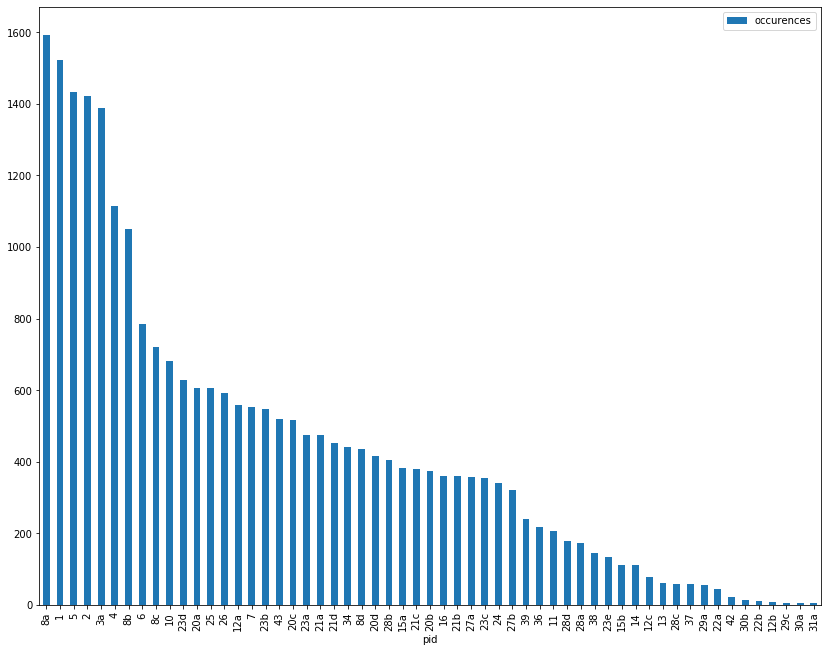

In [39]:
# plot results
pids_transitive_subclasses.plot(x='pid', y='occurences', kind='bar', figsize=(14,11)) 
#p8a, p1, p5, p2 and p3a most common patterns

# 5. Compare subclass, type and transitive-types

In [40]:
# calculate percentage distribution (note, can be more than 100 % in total because one pid can be used
# more than once to extract the entity)
no_subclasses = len(subclasses)
pids_analysis['percentage'] = pids_analysis['occurences']/no_subclasses * 100
pid_analysis_plot = pids_analysis.head(8) # only take top 8 for readability

In [41]:
# types
pids_analysis_types['percentage'] = pids_analysis_types['occurences']/len(types) * 100
pids_analysis_types.head()
pids_analysis_types = pids_analysis_types.head(8) # only take top 8 for readability

In [48]:
# transitive types
pids_analysis_ttypes['percentage'] = pids_analysis_ttypes['occurences']/len(ttypes) * 100
pids_analysis_ttypes.head()
pids_analysis_ttypes = pids_analysis_ttypes.head(8) # only take top 8 for readability

In [43]:
# transitive subclasses
pids_transitive_subclasses['percentage'] = pids_transitive_subclasses['occurences']/len(transitive_subclasses) * 100
pids_transitive_subclasses.head()
pids_transitive_subclasses = pids_transitive_subclasses.head(8) # only take top 8 for readability

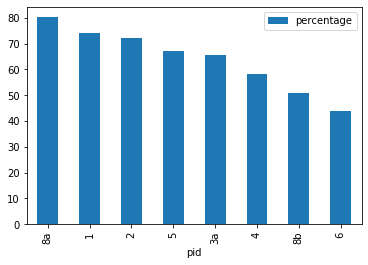

In [44]:
# plot all values together in 4 different charts
## subclasses
pid_analysis_plot.plot(x='pid', y='percentage', kind='bar') # subclasses

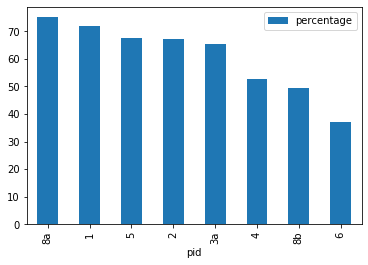

In [45]:
# transitive subclasses
pids_transitive_subclasses.plot(x='pid', y='percentage', kind='bar') # transitive types

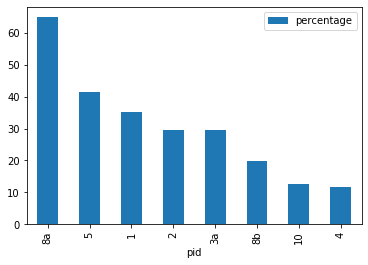

In [46]:
# types
pids_analysis_types.plot(x='pid', y='percentage', kind='bar') # types

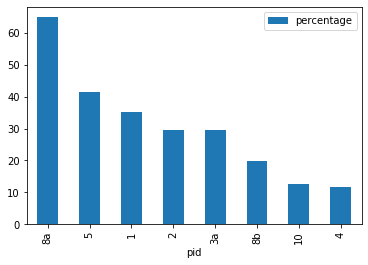

In [49]:
# transitive types
pids_analysis_ttypes.plot(x='pid', y='percentage', kind='bar') # transitive types